In [1]:
import numpy as np
import pandas as pd
import requests
from pykrx import stock
import time
from datetime import datetime

In [2]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False
stock_list = pd.DataFrame({'종목코드':stock.get_market_ticker_list(market="ALL")})
stock_list['종목명'] = stock_list['종목코드'].map(lambda x: stock.get_market_ticker_name(x))


In [3]:
stock_list.head()
stock_list.shape

(2595, 2)

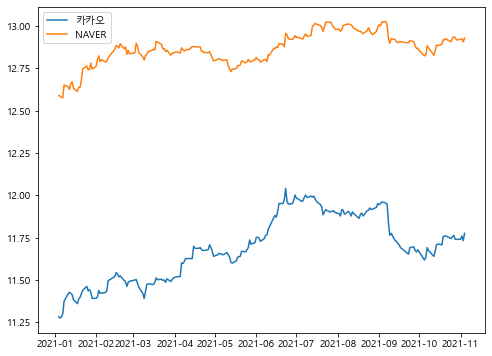

In [4]:
name1 = '카카오'
name2 = 'NAVER'
fromdate = str(20210101)
todate = str(20211104)

ticker1 = stock_list.loc[stock_list['종목명']== name1, '종목코드']
df1 = stock.get_market_ohlcv_by_date(fromdate=fromdate, todate=todate, ticker=ticker1)

ticker2 = stock_list.loc[stock_list['종목명']== name2, '종목코드']
df2 = stock.get_market_ohlcv_by_date(fromdate=fromdate, todate=todate, ticker=ticker2)

peal = np.log(df1['종가'])
dev = np.log(df2['종가'])

plt.figure(figsize=(8, 6))
plt.plot(peal)
plt.plot(dev)
plt.legend([f'{name1}',f'{name2}'])
plt.show()

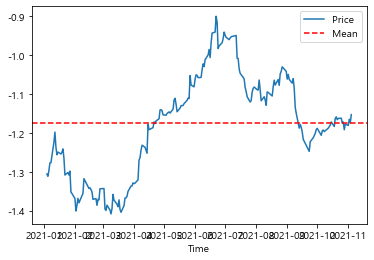

In [5]:
plt.plot(peal-dev)
plt.axhline((peal-dev).mean(), color='red', linestyle='--')
plt.xlabel('Time')
plt.legend(['Price', 'Mean'])
plt.show()

In [6]:
from statsmodels.tsa.stattools import coint
score, pvalue, _ = coint(peal,dev)
pvalue

0.7455230927844354

In [7]:
corr = np.corrcoef(peal, dev)
cov = np.cov(peal, dev)

xsd = np.std(peal, ddof=1)   # x의 표본표준편차
ysd = np.std(dev, ddof=1)   # y의 표본표준편차

cov / ( xsd * ysd )

array([[1.99881391, 0.79046542],
       [0.79046542, 0.5002967 ]])

In [8]:
def get_pvalue(ls):
    name1, name2 = ls[0], ls[1]

    fromdate = str(20210101)
    todate = str(20211104)

    ticker1 = stock_list.loc[stock_list['종목명']== name1, '종목코드']
    df1 = stock.get_market_ohlcv_by_date(fromdate=fromdate, todate=todate, ticker=ticker1)

    ticker2 = stock_list.loc[stock_list['종목명']== name2, '종목코드']
    df2 = stock.get_market_ohlcv_by_date(fromdate=fromdate, todate=todate, ticker=ticker2)

    data1 = np.log(df1['종가'])
    data2 = np.log(df2['종가'])

    score, pvalue, _ = coint(data1, data2)

    return pvalue  

In [9]:
name_ls = stock_list[:30]['종목명'].values
name_ls.shape

(30,)

In [10]:
from itertools import combinations
my_coms = list(combinations(name_ls, 2))  # name_ls 중 2개 선정

In [11]:
result = []
for coms in my_coms:
    if get_pvalue(coms) <= 0.01:
        result.append((f"{coms[0]}",f"{coms[1]}"))

result  

C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\statsmodels\tsa\stattools.py:1712: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  warnings.warn(
C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\statsmodels\regression\linear_model.py:926: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


[('BGF리테일', 'BYC'),
 ('BGF리테일', 'CBI'),
 ('BGF리테일', 'CJ CGV'),
 ('BGF리테일', 'CJ씨푸드1우'),
 ('BGF리테일', 'CJ프레시웨이'),
 ('CNT85', 'COWON')]

In [12]:
len(result)

6

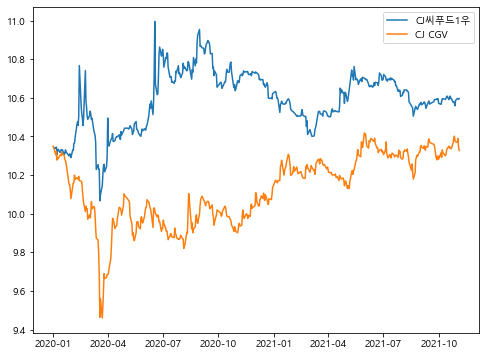

In [69]:
name1 = 'CJ씨푸드1우'
name2 = 'CJ CGV'
fromdate = str(20200101)
todate = str(20211104)

ticker1 = stock_list.loc[stock_list['종목명']== name1, '종목코드']
df1 = stock.get_market_ohlcv_by_date(fromdate=fromdate, todate=todate, ticker=ticker1)

ticker2 = stock_list.loc[stock_list['종목명']== name2, '종목코드']
df2 = stock.get_market_ohlcv_by_date(fromdate=fromdate, todate=todate, ticker=ticker2)

df_logscale1 = np.log(df1['종가'])
df_logscale2 = np.log(df2['종가'])

plt.figure(figsize=(8, 6))
plt.plot(df_logscale1)
plt.plot(df_logscale2)
plt.legend([f'{name1}',f'{name2}'])
plt.show()

In [70]:
## Normalization (Min-Max Scalar)  ( 0 ~ 1 )

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
data_scaled1 = scaler.fit_transform(np.array(df1['종가']).reshape(len(df1),1))
data_scaled2 = scaler.fit_transform(np.array(df2['종가']).reshape(len(df1),1))

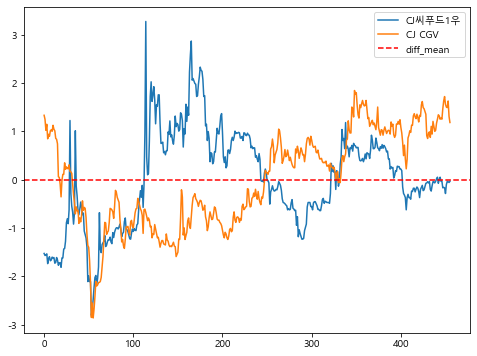

In [76]:
plt.figure(figsize=(8, 6))
plt.plot(data_scaled1)
plt.plot(data_scaled2)
plt.axhline((data_scaled1-data_scaled2).mean(), color='red', linestyle='--')
plt.legend([f'{name1}',f'{name2}','diff_mean'])
plt.show()

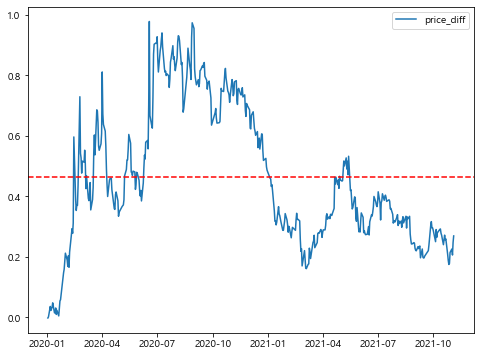

In [75]:

plt.figure(figsize=(8, 6))
plt.plot((df_logscale1-df_logscale2))
plt.axhline((df_logscale1-df_logscale2).mean(), color='red', linestyle='--')

plt.legend([f'price_diff'])
plt.show()